# BUSA8001 - Programming Task 3  

**Assignment Points**: 100  
**Assignment Weight**: 10%  
**Submission**: Submit your file using the link below


Provide your answers in this notebook and save it as `BUSA8001_programming_task3_MQ_ID.ipynb` where MQ_ID is your Macquarie University student ID number (e.g. if MQ_ID == 12345678 then you need to submit BUSA8001_programming_task3_12345678.ipynb). 

- Do NOT print your variables to screen unless explicitly asked to do so
- Marks will be deducted for not following instructions

---

**Problem 1**  - Total Marks: 7.5

**Q1**. Read the credit card dataset from Programming Task 1 into a DataFrame named `df` and  
- Rename the columns 'PAY_0' and 'default payment next month' as in Programming Task 2 
- Delete 'ID' column    
- Print columns of `df`  
- Print shape of `df`    
(2.5 marks) 




In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', skiprows=[0])
df = df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'payment_default'})
del df['ID']
print(df.columns)
print(df.shape)


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'payment_default'],
      dtype='object')
(30000, 24)


**Q2**. Feature Engineering - Create additional features and add them to `df` by squaring the following variables  
- LIMIT_BAL  
- All BILL_AMT variables  
- All PAY_AMT variables  

Name the new variables by appending "_2" to the existing variables that you transformed, e.g. LIMIT_BAL_2    
(5 marks)  

In [3]:
df['LIMIT_BAL_2']=df['LIMIT_BAL']**2
df['PAY_1_2']=np.power((df['PAY_1']),2)
df['PAY_2_2']=np.power((df['PAY_2']),2)
df['PAY_3_2']=np.power((df['PAY_3']),2)
df['PAY_4_2']=np.power((df['PAY_4']),2)
df['PAY_5_2']=np.power((df['PAY_5']),2)
df['PAY_6_2']=np.power((df['PAY_6']),2)
df['BILL_AMT1_2']=np.power((df['BILL_AMT1']),2)
df['BILL_AMT2_2']=np.power((df['BILL_AMT2']),2)
df['BILL_AMT3_2']=np.power((df['BILL_AMT3']),2)
df['BILL_AMT4_2']=np.power((df['BILL_AMT4']),2)
df['BILL_AMT5_2']=np.power((df['BILL_AMT5']),2)
df['BILL_AMT6_2']=np.power((df['BILL_AMT6']),2)
print(df.columns)
print(df.shape)


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'payment_default', 'LIMIT_BAL_2', 'PAY_1_2', 'PAY_2_2', 'PAY_3_2',
       'PAY_4_2', 'PAY_5_2', 'PAY_6_2', 'BILL_AMT1_2', 'BILL_AMT2_2',
       'BILL_AMT3_2', 'BILL_AMT4_2', 'BILL_AMT5_2', 'BILL_AMT6_2'],
      dtype='object')
(30000, 37)


<hr style="width:35%;margin-left:0;"> 

**Problem 2.** Cleaning data and dealing with categorical features - Total Marks: 20


**Q1**. Print `value_counts()` of 'SEX' column and create dummy variables 'SEX_MALE' and 'SEX_FEMALE' using `get_dummies()`.  
*Carefully* explain how the new variables are constructed. (2.5 marks)  

In [2]:
print(df.SEX.value_counts())
df = pd.get_dummies(df, columns = ['SEX'])
df.rename(columns = {1: 'SEX_MALE', 2: 'SEX_FEMALE'}, inplace = True)

2    18112
1    11888
Name: SEX, dtype: int64


**Q2**. Print `value_counts()` of 'MARRIAGE' column, provide its definition, and *carefully* comment on what you notice in relation to the definition of this variable. (2.5 marks) 

In [3]:
print(df.MARRIAGE.value_counts())
# df.info
# According to the type, it should be be of 3 categories either 'yes' or 'no' or 'other' as 1,2,3)
#No assigned attribute to varioabe "0" and is not defined among the three categories. 

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


**Q3**. Use `get_dummies()` on 'MARRIAGE' and create dummy variables 'MARRIAGE_MARRIED', 'MARRIAGE_SINGLE', 'MARRIAGE_OTHER'.   
Make sure you allocate all values of 'MARRIAGE' across the 3 newly created features appropriately.   
Explain how you created the new features and what decisions you had to make. (7.5 marks)   

In [4]:
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)
df = pd.get_dummies(df, columns = ['MARRIAGE'])
df.rename(columns={1: 'MARRIAGE_MARRIED', 2: 'MARRIAGE_SINGLE', 3: 'MARRIAGE_OTHER'})
# 0 value cells been changed to 3 to address it correctly.
# currently using 3 categories

,LIMIT_BAL,EDUCATION,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,payment_default,SEX_1,SEX_2,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,1,1,0,0
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,1,0,1,0
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,1,0
3,50000,2,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,1,0,0
4,50000,2,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,39,0,0,0,0,0,0,188948,...,5003,3047,5000,1000,0,1,0,1,0,0
29996,150000,3,43,-1,-1,-1,-1,0,0,1683,...,8998,129,0,0,0,1,0,0,1,0
29997,30000,2,37,4,3,2,-1,0,0,3565,...,22000,4200,2000,3100,1,1,0,0,1,0
29998,80000,3,41,1,-1,0,0,0,-1,-1645,...,1178,1926,52964,1804,1,1,0,1,0,0


**Q4**. In the column 'EDUCATION', convert values {0, 4, 5, 6} into the value 4. (7.5 marks)  

In [5]:
# print(df.EDUCATION.value_counts())
df.loc[df['EDUCATION'].isin([0, 4, 5, 6]), 'EDUCATION'] = 4

<hr style="width:35%;margin-left:0;"> 

**Problem 3** Preparing X and y arrays - Total Marks: 7.5

**Q1**. Delete the columns 'SEX' and 'MARRIAGE' (2.5 marks)

In [70]:
# df.columns
#already dropped on the above code

Index(['LIMIT_BAL', 'EDUCATION', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'payment_default', 'LIMIT_BAL_2',
       'PAY_1_2', 'PAY_2_2', 'PAY_3_2', 'PAY_4_2', 'PAY_5_2', 'PAY_6_2',
       'BILL_AMT1_2', 'BILL_AMT2_2', 'BILL_AMT3_2', 'BILL_AMT4_2',
       'BILL_AMT5_2', 'BILL_AMT6_2', 'SEX_1', 'SEX_2', 'MARRIAGE_1',
       'MARRIAGE_2', 'MARRIAGE_3'],
      dtype='object')

**Q2**. Create `y` from 5000 observations (using observations 5000 - 9999) of 'payment_default' column from df. Similarly, create `X`  from 5000 corresponding observatations of all the remaining features in `df` (2.5 marks)

In [6]:
from sklearn.model_selection import train_test_split

y = pd.DataFrame(df['payment_default'])[5000:9999].values.ravel()
X = df.drop(['payment_default'], axis = 1)[5000:9999]


**Q3**. Use an appropriate scikit-learn library we learned in class to create `y_train`, `y_test`, `X_train` and `X_test` by splitting the data into 75% train and 25% test datasets.  
Set random_state to 7 and stratify subsamples so that train and test datasets have roughly equal proportions of the target's class labels. (2.5 marks) 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7, stratify = y)

<hr style="width:35%;margin-left:0;"> 

**Problem 4**. Optimize hyperparameters using grid search and SVC - Total Marks: 40


**Q1**. Use `make_pipeline` to create a pipeline called `pipe_svc` consisting of:   
- StandardScaler    
- PCA (set random_state to 2)  
- SVC (set random_state to 2)  
   
(10 marks)   

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


pipe_svc = make_pipeline(StandardScaler(),
                         PCA(random_state = 2),
                         SVC(random_state = 2))

**Q2**. Use `GridSearchCV` to create `gs` object, fit the model and tune the following hyperparameters     
- SVC $C$ parameter - grid search over the following values [0.05, 0.5, 1, 5]    
- SVC kernel - grid search over 3 alternatives: linear, sigmoid, and rbf  
- Number of PCA components - grid search over the following 3 values [2, 5, 10]        
- When implementing `GridSearchCV` set the following options (leaving everying else to their default values)    
    - accuracy for scoring   
    - `refit` to True   
    - number of cross-validation folds to 10   
    - `n_jobs=-1`     
     
(20 marks)   

In [11]:
from sklearn.model_selection import GridSearchCV

val = [2,5,10]
param_range = [0.05, 0.5, 1, 5]
param_grid = [{'svc__C': param_range,
               'svc__kernel': ['linear'],
              'pca__n_components':val},
              {'svc__C': param_range,  
               'svc__kernel': ['rbf'], 
              'pca__n_components': val},
             {'svc__C': param_range,  
               'svc__kernel': ['sigmoid'], 
              'pca__n_components': val}]
gs = GridSearchCV(estimator = pipe_svc,          
                  param_grid = param_grid, 
                  scoring = 'accuracy', 
                  refit = True, 
                  cv = 10, 
                  n_jobs = -1)




**Q3**. Using the best model optimised by grid-search print the following   
- cross-validation `best_score_`  
- accuracy for the training set  
- accuracy for the test set    

(10 marks)     


In [13]:
gs = gs.fit(X_train, y_train)
print('The Best score is:', gs.best_score_)
print('The Test accuracy is:', gs.score(X_test, y_test))
print('The Train accuracy is:', gs.score(X_train, y_train))

The Best score is: 0.7956777183600712
The Test accuracy is: 0.8048
The Train accuracy is: 0.7991464390504135


<hr style="width:35%;margin-left:0;"> 

**Problem 5.** Confusion Matrix - Total marks: 25   

**Q1**. Use the best fitted model of `gs` to print the confusion matrix. (5 marks)  

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[929  33]
 [211  77]]


**Q2**. Plot the confusion matrix, and on its basis compute the True Positive Rate, False Positive Rate and Precision. (10 marks)   

[[929  33]
 [211  77]]
77 211 33 929
FPR 0.7326388888888888
PRE 0.8149122807017544
TPR 0.9656964656964657


Text(0, 0.5, 'True label')

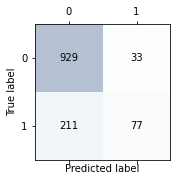

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)
# print(y_test.shape)


tp, fn, fp, tn = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=[0, 1]).ravel()
print(tn, fp, fn, tp)
FPR= fp/(fp+tn)
PRE = tp/(tp+fp)
TPR = tp/(tp+fn)

print("FPR", FPR)
print("PRE", PRE)
print("TPR",TPR)


fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

**Q3**. Looking at the confusion matrix and the three quantities that you computed what is the greatest source of risk to the credit card company should it rely on the predictions constructed by our model optimised for `accuracy`?   
Explain your answer in detail. (10 marks)   

In [24]:
print(f'Accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred):.3f}')
# If seen, Accuracy score shows 0.804 and True positives are 927. Keeping in mind False positives are 210 customers. The prediction shows there are 210 false positives which risks the position of the
# company in the market. Higher amount of false judgment can risk the liquidity and raise eyebrows on identifying if there's any fraudlent involved.
# FPR is 72% which shows high occurance of error and dusruption. Company should take this prediction seriously and try to find the solution to ommit the false and flaw in their system.

Accuracy: 0.804
